# MODEL PROJECT

## 1. Introduction

We start in *section.3* with a classical intertemporal optimization problem in two periods. Our representative consumer exhibits a CRRA utility function and we want to detect his optimizing behaviour given underlying parameters. In *section.4*, instead, we focus on the optimizing behaviour of our representative firm. Its production function satisfies the Inada condition and  exhibits positive but diminishing marginal products. We come up with the optimal conditions to satisfy profit maximization.   
In *section.5*, we add complexity to the model making our representative consumer and firm interact under the features of the classical Ramsey model. Here, we rely on the book *Robert J.Barro and Xavier Sala-i-Martin, Economic Growth* for the main results. We find the steady state for the given parameters and we come up with the generical phase diagram showing the dinamics of capital and consumption. Finally we plot sample paths for different initial value of consumption trying to detect the unique saddle path. 

## 2. Import packages

In [1]:
import numpy as np
import scipy as sp
import math
from scipy import optimize
import sympy as sm
from scipy import linalg
from sympy import Derivative
from scipy import interpolate
from sympy import symbol,function
import ipywidgets as widgets
from IPython.display import display

#autoreload model when code is run
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

## 3. Consumer optimization problem

Before moving to the Ramsey model, we focus on our representative consumer and his optimization problem. The standard Ramsey model assumes that the household exhibits a CRRA utility function with respect to consumption of the type:  

$$u(c)=\frac{c^{1-\theta}-1}{1-\theta}$$  

where $\theta$ is the measure of relative risk aversion.
This type of preferences is really useful when $\theta=1$ because in this case the CRRA utility becomes a logarithmic utility. 
We create a simple utility maximization problem in two periods ($t=0$ and $t=1$) to detect how these preferences impact the consumer optimal behavior.
Our representative consumer maximizes consumption in the present $c_0$ and in the future $c_1$ taking into consideration his labour income is $w_0$ today and $w_1$ tomorrow. So, for our consumer, the utility maximization problem becomes:  

$$max \hspace{2pt} U(c_0,c_1) = u(c_0)+e^{-\rho}u(c_1)$$  

under the constraint:  

$$c_0+\frac{1}{1+r}{c_1} = w_0 +\frac{1}{1+r}{w_1}$$  

where $\rho$ is the subjective discount rate and $r$ the interest rate.

Now, before solving the problem, we assume some initial values for the parameters and we code the utility function and constraint. 

In [2]:
#a. Defining initial values for the various parameters
theta = 0.5
w_t= 10      #present labour income
w_t1 = 10     #future labour income
rho = 0.1
r = 0.5

#a. Defining utility function
def utility(ct, theta):
    if theta != 1:
        return (ct**(1-theta)-1)/(1-theta)
    else:
        return np.log(c_t)
    
#b. Defining utility function for two periods
def inter_util(c_t, c_t1, rho, theta):
    return utility(c_t, theta)+np.exp(-rho)*utility(c_t1, theta)
 
#c. Defining constraint
def constraint(c_t, c_t1, w_t, w_t1, r):
    return w_t+(1/(1+r))*w_t1-c_t-(1/(1+r))*c_t1

To solve the maximization problem we firstly set the lagrangian:  

$$L=\max_{c_{0},c_{2}}\bigg(\frac{c_{0}^{1 - \theta} - 1}{1 - \theta}\bigg) + e^{-\rho}\bigg(\frac{c_{1}^{1 - \theta} - 1}{1 - \theta}\bigg) + \lambda\bigg(w_{0} + \frac{1}{1 + r}w_{1} - c_{0} - \frac{1}{1 + r}c_{1}\bigg)$$  

and we compute the first order conditions:  

$$c_{0}^{-\theta} = \lambda$$
$$e^{-\rho}c_{1}^{-\theta}=\frac{1}{1 + r}\lambda$$  

The above reduces to:  

$$c_{0}^{-\theta} = e^{-\rho}(1 + r)c_{1}^{-\theta}$$    

We transpose the above into code and we solve the optimization problem.

In [3]:
#d. Defining Euler equation
def euler(c_t, c_t1, rho, theta, r):
    return c_t**(-theta)-np.exp(-rho)*(1+r)*(c_t1)**(-theta)

#e. Creating optimization function
def optimalchoice(x, rho, theta, r, w_t, w_t1):
    op = [euler(x[0], x[1], rho, theta, r)]
    op.append(constraint(x[0],x[1], w_t, w_t1, r))
    return op

#f. Applying fsolve function
ct_star, ct1_star = optimize.fsolve(optimalchoice, args=(rho, theta, r, w_t, w_t1), x0=(0.5, 0.5))
utility_star = inter_util(ct_star, ct1_star, rho, theta)

#g. Printing results
print(f'The optimal consumption at the present is: {ct_star:.2f}')
print(f'The optimal consumption tomorrow is: {ct1_star:.2f}')
print(f'Utility from optimal bundle is: {utility_star:.2f}')

The optimal consumption at the present is: 7.48
The optimal consumption tomorrow is: 13.78
Utility from optimal bundle is: 8.38


With these particular parameters' values, our household decides to consume more in the future (13.78) than in the present (7.48).  
We know construct an interactive graph to detect his optimizing bundle for changes in the various parameters.

In [4]:
def plot_max_problem(w_t, w_t1, theta, rho, r):

    fig1 = plt.figure(figsize=(10,10))
    ax = fig1.add_subplot(1,1,1)
    
    # Applying fsolve function
    ctstar, ct1star = optimize.fsolve(optimalchoice, args = (rho, theta, r, w_t, w_t1), x0=(0.5, 0.5))
    utility_star = inter_util(ct_star, ct1_star, rho ,theta)
    
    # Plot the budget constraint
    c_t = np.linspace(0, 30, 100)
    ax.plot(c_t, (1 + r) * (w_t - c_t) + w_t1, color='k')
    
    # Plot the optimal bundle and converging dashed lines
    ax.hlines(ct1star, 0, ctstar, linestyle='dashed')
    ax.vlines(ctstar, 0, ct1star, linestyle='dashed')
    ax.plot(ctstar, ct1star, marker='o', markersize = 7, color ='red')
    
    # Add optimal values for c_t and c_t1
    ax.text(0, ct1star, "{:.1f}".format(ct1star), color="red", ha="right", va="center")
    ax.text(ctstar, 0, "{:.1f}".format(ctstar), rotation = 'vertical', color="red", ha='center', va = 'top')
    
    # Add, axis limits, labels, title
    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    ax.set_xlabel(r'Present Consumption, $C_{t}$', fontsize=14)
    ax.set_ylabel(r'Future Consumption, $C_{t+1}$', fontsize=14)
    ax.set_title(r'Optimal Bundle For CRRA Utility', fontsize=20, pad=15)
    
    plt.show()

def plot_time():
    widgets.interact(plot_max_problem,
    w_t= widgets.IntSlider(
           description='$w_{t}$',
           min=1,
           max=10,
           step=1,
           value=7,
           continuous_update=False,
    ),
    
    w_t1 = widgets.IntSlider(
            description="$w_{t+1}$",
            min=1,
            max=10,
            step=1,
            value=7,
            continuous_update=False,
    ),
    theta = widgets.FloatSlider(
            description="$\\theta$",
            min=0.5,
            max=0.9,
            step=0.02,
            value=0.5,
            continuous_update=False,
    ),
    rho = widgets.FloatSlider(
            description="$\\rho$",
            min=0.1,
            max=0.99,
            step=0.05,
            value=0.1,
            continuous_update=False,
    ),
    r = widgets.FloatSlider(
            description="$r$",
            min=0.1,
            max=0.5,
            step=0.1,
            value=0.5,
            continuous_update=False,
    ),
);  

In [5]:
plot_time()

interactive(children=(IntSlider(value=7, continuous_update=False, description='$w_{t}$', max=10, min=1), IntSl…

We can know study the behaviour of our consumer more in details. All the following changes are ceteris paribus, that is, when we change one particular parameter, the others remain fixed.  
First of all, if the measure of risk aversion ($\theta$) increases, then our household will increase present consumption and lower future one. The same happens for an increase in the rate of subjective discount ($\rho$).  
Theoretically, if the interest rate ($r$) increases, then present consumption becomes more expensive in comparison to future consumption and we expect consumers to decrease $c_t$ for $c_{t+1}$ (substitution effect). This is actually what happens in the case of our representative household. Futhermore A strong income effect seems not to be present for every value of $r$.
An increase only in the future wage ($w_t$), present wage ($w_{t+1})$ or both leads to some increase in both present and future consumption as the budget constraint move rightwards and our consumer splits the additional income in some way among present and future. The way this more income is divided between the two periods depends on the initial wages as well as the values of the other parameters.  
In conclusion it is worth to underline that in the case the subjective rate of discount ($\rho$) equals ($r$), the interest rate, then our consumer with CRRA utility function exactly divides overall income equally between present and future consumption. 

## 4. Firm optimization problem 

In the Ramsey model the representative firm has a production function that satisfies the neoclassical properties of constant return to scale in $K$ (capital) and $L$ (Labour) and each input exhibits positive but diminishing marginal product. 
Moreover, the problem of maximizing the present value of profit reduces to
a problem of maximizing profit in each period without regard to the outcomes in other periods.
The firm profit at any point in time is:

$$\pi = F(K,L) - wL - (r+\delta)K$$

where $F(K,L)$ is the production function, $w$ is the wage rate, $r$ is the interest rate and $0 \leq \delta \leq 1$ the discount rate.  
In the Ramsey model, to obtain constant growth in the steady-state, we have to deal with quantities per unit of effective labor and so we will do, assuming that the technology will be $T=1$. From now on, for simplicity, we assume that technology will increase at the rate $x=0$. The production function will be rewritten in intensive form:  

$$\hat{y}=f(\hat{k})$$  

where $\hat{y}=\frac{Y}{LT}$ and $\hat{k}=\frac{K}{LT}$. The Profit function becomes:

$$\pi= f(\hat{k}) - w - (r+\delta)\hat{k}$$  

Specifically, we are going to assume the following production function:  

$$\hat{y}=f(\hat{k})=\hat{k}^{\alpha}$$  

where $0 \leq \alpha \leq 1$ is the capital share of output and $\hat{k}$ is capital per effective labour. 
We are going to check that the marginal product of capital is diminishing ($f''(\hat{k})< 0$), that the Inada conditions are satisfied and only afterwards we will calculate the profit maximization conditions.

In [6]:
#a. Creating parameters
sm.init_printing(use_unicode=True) # for pretty printing        
alpha = sm.symbols('alpha')        # capital share

k = sm.symbols('k')                # capital per effective worker               

w = sm.symbols('w')                # wage

l = sm.symbols('L')                # labour per effective worker

delta = sm.symbols('delta')        # capital depreciation rate
r = sm.symbols('r')                # interest rate

The production function is:


The profit function is:


The first derivative with respect to k is:


The second derivative with respect to k is:


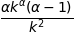

First Inada condition is:


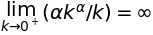

Second Inada condition is:


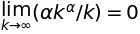

In [7]:
#b. Defining production function
prod = k**alpha
print(f'The production function is:')
display(prod)

#c. Defining profit function
profit = prod - (r+delta)*k - w
print(f'The profit function is:')
display(profit)

#d. Calculating first and second derivatives with respect to k
print(f'The first derivative with respect to k is:')
sol = sm.diff(prod,k)
display(sol)
print(f'The second derivative with respect to k is:')
sol1 = sm.diff(prod,k, k)
display(sol1)

#e. Check Inada conditions
print(f'First Inada condition is:')
inada1 = sm.Limit(sol,k,0)
inada_ = sm.Eq(inada1,sm.oo)
display(inada_)
print(f'Second Inada condition is:')
inada2 = sm.Limit(sol,k, sm.oo,0)
inada_2 = sm.Eq(inada2, 0)
display(inada_2)

Clearly, the first derivative is positive and the second derivative is negative confirming decreasing marginal product of capital per effective labour. Even if it should be already clear that the Inada conditions are satisfied, we are going to plot the production function for different values of alpha to check that it is actually concave as concavity satisfies Inada conditions.

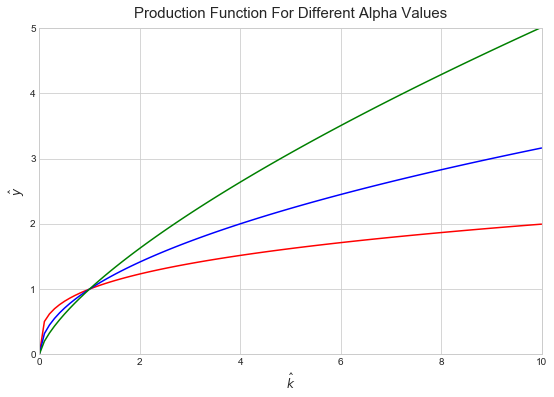

In [8]:
#f. Setting different parameters vaues
kvec = np.linspace(0,10,100)
alpha = 0.3
alpha1 = 0.5
alpha2 = 0.7
y = kvec**alpha
y1 = kvec**alpha1
y2 = kvec**alpha2

#g. Plotting the functions
prod_im = plt.figure(figsize = (9,6))
ax = prod_im.add_subplot(1, 1, 1)
ax.plot(kvec,y, 'red')
ax.plot(kvec,y1, 'blue')
ax.plot(kvec,y2, 'green')
ax.set_title('Production Function For Different Alpha Values', fontsize=15, pad=10)
ax.set_ylabel('$\hat{y}$', fontsize=12)
ax.set_xlabel('$\hat{k}$', fontsize=12)
ax.set_xlim(0,10)
ax.set_ylim(0,5)

plt.show()

So our production function is confirmed to be concave. Moreover, we can notice that higher levels of alpha lead to higher outcome per effective worker.  
We now move to the profit maximization conditions.

In [9]:
#h. Profit maximization with respect to capital per effective worker
print(f'Optimazing the profit with respect to k, we obtain:')
profitk = sm.Eq(sm.diff(profit,k))
display(profitk)
print(f'And the optimal k is:')
profitk1 = sm.solve(profitk,k)
display(profitk1)

#i. Profit maximization with respect to labour per effective worker
print(f'Optimazing the profit with respect to l, we obtain the optimal condition that the wage as to equal:')
profitl = (prod - k - sol)
profitleq = sm.Eq(profitl, w)
display(profitleq)

Optimazing the profit with respect to k, we obtain:


And the optimal k is:


Optimazing the profit with respect to l, we obtain the optimal condition that the wage as to equal:


## 5. Ramsey Model

We now make our representative consumer and firm interacting under the classical framework of the Ramsey model. Our optimizing household of *section.3* mantains the same CRRA utility function with respect to consumption but now he maximizes over an infinite horizon taking into account the welfare and resources of his prospective descendants. He expects the size of his future family to grow at the rate $n$, given as exogenous and constant. We normalize the size of his family at time $t= \small{0}$ to 1, so that at the generic time $t$, the size of the family will be $L(t)=e^{nt}$. The utility maximization problem become:
 
$$U= \int_{0}^{\infty} e^{-(\rho-n)t}\left[\frac{c^{1-\theta}-1}{1-\theta}\right]dt$$

Futhermore the household holds assets ($a(t)$) which pay rate of return $r(t)$ and he supplies inelastically one unit of labor services for the wage rate $w(t)$. We assume a closed economy so that no assets can be traded internationally and we assume a competitive market so that the interest rate, $r(t)$, and the wage rate $w(t)$ are assumed as given.                              
The total income received is the sum of labor income, $w(t)·L(t)$, and asset income, $r(t)·(Assets)$ and the income that it is not consumed is used to accumulate more assets:  

$$\frac{d(Assets)}{dt} = r(Assets)+wL-C$$  

In per-capita terms, the household budget constraint becomes:  

$$\dot{\alpha} = (r-n)\alpha+w-c$$

We assume that the credit market imposes a constraint on the amount of borrowing to rule out chain-letter possibilities (No Ponzi game condition). The appropriate restriction turns out to be that the present value of assets must be asymptotically non-negative:  

$$\lim_{t \to \infty} \bigg\{ \alpha(t)*exp\left[-\int_{0}^{t}[r(v)-n]dv \right] \bigg\} \geq 0$$

Our representative firm maintains the same characteristics depicted in *Section.4*. As before, initial technology is normalized to 1  and for simplicity we assume that it grows at rate $x=0$.   
One unit of output can be used to generate one unit of household consumption or one unit of additional capital. Therefore, as long as the economy is not at a corner solution, in which all current output goes into consumption or capital, the price of capital in terms of consumption will be fixed at unity.

We briefly derive the fundamental equations of the model (for complete derivations have a look in *Barro & Martin, Chapter 2* and relative appendix).  
Since the economy is closed, assets per adult person, $\hat{a}$, equal capital per worker, $\hat{k}$. Given the consumer budget constraint, the optimizing conditions for $r$ and $w$ found in *Section.4* and $a=k$, we obtain the resource constraint for the economy which determines the evolution of capital per effective labour:

$$\dot{\hat{k}} = \hat{k}^{\alpha} - \hat{c} -(x+n+\delta)\hat{k} \hspace{7pt}(1)$$

The differential equation that determines the evolution of the consumption per effective labour, obtained from the household optimization problem, is instead:

$$\frac{\dot{\hat{c}}}{\hat{c}}=\frac{\hat{c}}{c}-x=\frac{1}{\theta} \big[\alpha \hat{k}^{\alpha-1} -\delta -\rho-\theta x \big] \hspace{7pt}(2)$$

The transversality condition becomes:  

$$\lim_{t \to \infty} \bigg\{ \hat{k}*exp\left[-\int_{0}^{t}[\alpha \hat{k}^{\alpha-1} -\delta - n - x]dv \right] \bigg\} = 0$$

The $\dot{k}=0$ locus is determined by equating (1) to 0:

$$\hat{c}= \hat{k}^{\alpha}-(x+n+\delta)\hat{k}$$

Equation (2) implies instead that the $\dot{c}=0$ locus is satisfied when:

$$\alpha \hat{k}^{\alpha-1}=\delta +\rho+\theta x$$

The steady state values for $\hat{c}$ and $\hat{k}$ are determined by setting the expression (1) and (2) to zero. Moreover, the determination of the steady state occurs at the intersection of the vertical line for $\dot{\hat{c}}=0$ and the solid curve for $\dot{\hat{k}}=0$. The two equations for the steady state quantities are:

$$ \hat{k}^{*}=\big(\frac{\delta+\rho+ x\theta}{\alpha}\big)^{\frac{1}{\alpha-1}}$$

$$ \hat{c}^{*}=(k^{*})^{\alpha}-(n+\delta+x)k^{*}$$

and steady-state value for the production per effective labour becomes $\hat{y}^{*}=(\hat{k}^{*})^{\alpha}$.  
After some calculations, the transversality condition implies that $\rho>n+(1-\theta)x$. If $\rho$ doesn't satisfy this condition, the household's optimization problem is not well posed and infinite utility can be attained if consumption grows at the rate $x$.
The capital equation for $k_{t+1}$ and the euler equation $\hat{c_{t+1}}$ are obtained from differentiating (1) and (2) respectively:  

$$\hat{k}_{t+1}= \big[\hat{k}^{\alpha}+\hat{k}e^{-\delta}-\hat{c}\big]e^{(-(x+n))}$$  
$$\hat{c}_{t+1}= e^{-x}\big[e^{-rho}(e^{-\delta}+\alpha \hat{k}_{t+1}^{\alpha-1}\big]^{\frac{1}{\theta}}\hat{c}_t$$

We now start to code the main equation for the model and we find the steady-state values for consumption, capital and production for our given values of $\theta$, $\rho$, $n$, $\delta$, $\alpha$ and $x$.


In [10]:
#a. Parameter values 
rho = 0.015          # subjective discount rate
theta = 1.7          # measure of relative risk aversion
x = 0                # growth rate of technology 
alpha = 0.3          # capital share of output
n = 0.003            # growth rate of population
delta = 0.03         # discount rate of capital

#b. Transversality condition must be satisfied
print(f'Is the transversality condition satisfied?')
def transversality():
    if  rho > n + (1 - theta)*x:
        print(f'Yes, it is satisfied.')
    else:
        print(f'No, it is not satisfied.')

transversality()

Is the transversality condition satisfied?
Yes, it is satisfied.


In [11]:
#c. Defining production function
def prod(k_t):
    return k_t**alpha

#d. Defining the consumption euler equation obtained from 1
def cons_t1(c_t, k_t):
    return np.exp(-x) * (np.exp(-rho) * (np.exp(-delta) + alpha * cap_t1(k_t, c_t)**(alpha - 1)))**(1 / theta) * c_t

#e. Defining the capital equation obtain from 2
def cap_t1(k_t,c_t):
    return (prod(k_t) + np.exp(-delta) * k_t - c_t) * np.exp(-(x + n))


In [12]:
#f. Steady state capital
def k_star():
    return ((delta + rho + theta*x)/alpha)**(1 / (alpha-1))

#g. Steady state consumption
def c_star():
    return prod(k_star())-(n+delta+x)* k_star()

#h. Steady state production
def y_star():
    return (k_star())**alpha

#i. Values of steady state capital and consumption for our chosen variables
print(f'The steady state capital per effective labour is: {k_star():.1f}')
print(f'The steady state consumption per effective labour is: {c_star():.1f}')
print(f'The steady state production per effective labour is: {y_star():.1f}')

The steady state capital per effective labour is: 15.0
The steady state consumption per effective labour is: 1.8
The steady state production per effective labour is: 2.3


So, for the particular values we gave to the parameters, the steady state capital per effective labour is 15.2, consumption 1.8 and production 2.3.

### 5.2 Generical Phase Diagram

The Ramsey model is interesting for its predictions about the path of capital and consumption growth given initial condition $\hat{c}_0$ and $\hat{k}_0$. We now want to plot the generic phase diagram showing the nature of this dynamics.

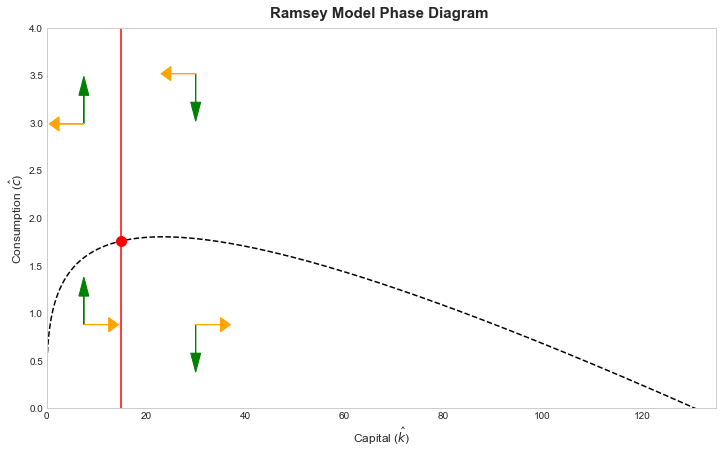

In [13]:
#a. locus for capital
def locus_cap(k_t):
    return prod(k_t) - k_t*(delta + n + x)

#b. Create a grid of points for plotting
x_vec = np.linspace(0, 500, 7000)

#c. Constructing the generic phase diagram 
phase = plt.figure(figsize=(12,7))
plt.xlim(0,135)
plt.ylim(0,4)
plt.grid(False)
plt.xlabel([])

#c.1 Adding the capital and consumption locii
plt.plot(x_vec, locus_cap(x_vec), linestyle ='--', color='black') 
plt.axvline(k_star(), linestyle = '-', color = 'red')
plt.plot(k_star(), c_star(), marker='o', markersize = 10, color ='red')

#c.2 Adding arrows to indicate dynamics 
plt.arrow((1/2)*k_star(), (1/2)*c_star(), dx=0, dy=0.3, head_width = 2, head_length= 0.2, color = 'green')
plt.arrow((1/2)*k_star(), (1/2)*c_star(), dx=5, dy=0, head_width = 0.15, head_length= 2, color = 'orange')
plt.arrow((1/2)*k_star(), 1.7*c_star(), dx=0, dy=0.3, head_width = 2, head_length= 0.2, color = 'green')
plt.arrow((1/2)*k_star(), 1.7*c_star(), dx=-5, dy=0, head_width = 0.15, head_length= 2, color = 'orange')

plt.arrow(2*k_star(), (1/2)*c_star(), dx=0, dy=-0.3, head_width = 2, head_length = 0.2, color = 'green')
plt.arrow(2*k_star(), (1/2)*c_star(), dx=5, dy=0, head_width = 0.15, head_length = 2, color = 'orange')
plt.arrow(2*k_star(), 2*c_star(), dx=0, dy=-0.3, head_width = 2, head_length = 0.2, color = 'green')
plt.arrow(2*k_star(), 2*c_star(), dx=-5, dy=0, head_width = 0.15, head_length = 2, color = 'orange')

#c.3 Adding axis labels and title
plt.xlabel('Capital ($\hat{k}$)', fontsize = 12)
plt.ylabel('Consumption ($\hat{c}$)', fontsize = 12)
plt.title('Ramsey Model Phase Diagram ', fontsize=15, weight='bold', pad = 10)
plt.show()

The dashed black line represents the $\dot{k}=0$ loci and red line the $\dot{c}=0$ loci (the other loci where $\dot{c}=0$ corresponds the the horizontal axis $\hat{c}=0$). The red dot displays, instead, the steady state.
The arrows depict the nature of the dinamics for consumption and capital. So, consumption rises for value of capital $\hat{k}<k^{*}$ (green arrows point upwards) and decreases otherwise (green arrows point downwards). Capital, instead, falls for values of consumption above the dashed loci (yellow arrows point leftwards) and rises for values below (yellow arrows point rightwards).

### 5.3 Plotting different  paths

In the previous subsection we got an overall idea of the dinamics of the systems. Now, we are going to plot the consumption/capital paths for different initial values of consumption. We will see that only one precise value of $c_0$ will lead us to the the steady state and this path is called the saddle path.

In [14]:
#a. Create dictionary for all parameters values
parameters = {'rho':rho, 'theta':theta, 'n':n, 'alpha':alpha, 'x':x, 'delta':delta}

#b. Create a class to make our plotting easier
class Ramsey(object):
    
    def __init__(self, parameters, k_t=None, c_t=None):
        
        # current value of state variable, k
        self.c_t            = c_t
        self.k_t            = k_t
        # dictionary of parameter values
        self.par   = parameters
        # dictionary of steady state values        
        self.steadystate      = {'k_star':self.k_ss(self.par), 'c_star':self.c_ss(self.par)}
            
        
    def k_ss(self, parameters): 
        """
        The steady-state level of capital stock per effective worker
        """
        return ((delta + rho + theta*x)/alpha)**(1 / (alpha-1))
    
    
    def c_ss(self, parameters): 
        """
        The steady-state level of consumption per effective worker
        """
        k_star = self.k_ss(parameters)
        
        return prod(k_star)-(n+delta+x)* k_star
    

    def cap_t1(self, k_t, c_t):
        """
        Next period's capital stock per effective worker 
        """
        return np.exp(-(x + n)) * (k_t**alpha + np.exp(-delta) * k_t - c_t)
    
    
    def cons_t1(self, k_t, c_t):
        """
        Next period's consumption per effective worker
        """
        return np.exp(-x) * (np.exp(-rho) * (np.exp(-delta) + alpha * cap_t1(k_t, c_t)**(alpha - 1)))**(1 / theta) * c_t
    

    def follow(self):
        """
        Update the state variables
        """
        self.k_t = self.cap_t1(self.k_t, self.c_t) 
        self.c_t = self.cons_t1(self.k_t, self.c_t)

    def sample(self, n=None):
        """
        Generate sample path of length n starting from the current state
        """
        path = np.zeros(shape=(n, 2))
        
        for s in range(n):
            path[s, 0] = self.k_t
            path[s, 1] = self.c_t
            self.follow()
        
        return path

    

    def algorithm(self, k0=None, c0=None, eps=1.5e-07):
        """
        Non-linear saddle path for the Ramsey model using the 
        'forward shooting' algorithm 
        """
        # compute steady state values
        k_star, c_star = self.steadystate['k_star'], self.steadystate['c_star']
        
        if k0 <= k_star:
            c_low = 0
            c_high = c_star
        else:
            c_low = c_star
            c_high = k0**alpha
        c0 = (c_high + c_low) / 2
        self.k_t, self.c_t = k0, c0
    
        # Initialize a counter
        col  = 0
        iterations = 0
        
        # Forward Shooting Algorithm
        while 1:
            self.follow()
            dis = np.abs(((self.k_t - k_star)**2 + (self.c_t - c_star)**2)**1/2)
            col = col + 1
            if k0 <= k_star:
                if self.k_t > k_star:
                    if dis < eps:
                        break
                    else: # initial c_low too low
                        c_low = c0
                        c0 = (c_high + c_low) / 2
                        self.k_t, self.c_t = k0, c0
                        col = 0
                if self.c_t > c_star:
                    if dis < eps:
                        break
                    else: # initial c_high too high
                        c_high = c0 
                        c0 = (c_high + c_low) / 2
                        self.k_t, self.c_t = k0, c0
                        col = 0
            else:
                if self.k_t < k_star:
                    if dis < eps:
                        break
                    else: # initial c_low too high
                        c_high = c0 
                        c0 = (c_high + c_low) / 2
                        self.k_t, self.c_t = k0, c0
                        col = 0
                if self.c_t < c_star:
                    if dis < eps:
                        break
                    else: # initial c_low too low
                        c_low = c0
                        c0 = (c_high + c_low) / 2
                        self.k_t, self.c_t = k0, c0
                        col = 0
                
        self.k_t, self.c_t = k0, c0
        solution = self.sample(col)

        return [self.c_t, solution, col, dis]


C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separat

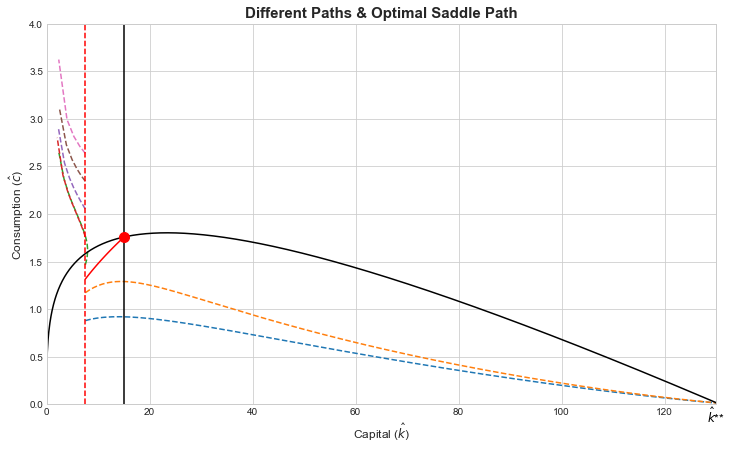

In [15]:

#c. Create a reference to the class Ramsey
ram = Ramsey(parameters)

#d. Initial levels of consumption and production
ram.c_t, ram.k_t = 10, 0.5

#e. Updating the system 
ram.follow()
ram.k_t, ram.c_t

#f. Generating a sample path of length 10  and grid
ram.sample(30)
x1_vec = np.linspace(0, 500, 7000)

#g. Given an initial level of capital
k0 = 0.5 * ram.steadystate['k_star']

#h. Different initial conditions for choices of consumption per effective worker
in_consvalues = np.linspace(0.5 * ram.steadystate['c_star'], 1.5 * ram.steadystate['c_star'], num=7)

#i. Creating a new plot
phase1 = plt.figure(figsize=(12,7))

#j Sample path for each value of consumption
for c_t in in_consvalues:
    ram.k_t, ram.c_t = k0, c_t
    tmr = ram.sample(3000) 
    plt.plot(tmr[:, 0], tmr[:, 1], linestyle ='dashed')

#k. Adding loci 
plt.plot(x1_vec, locus_cap(x1_vec), linestyle = 'solid', color ='black')
plt.axvline(ram.steadystate['k_star'], linestyle = 'solid', color='black' )
plt.plot(ram.steadystate['k_star'], ram.steadystate['c_star'], marker='o', markersize=10, color='red') 

#l. Adding saddle path
ram_sol = ram.algorithm(k0, eps=1.5e-04)
plt.plot(ram_sol[1][:, 0], ram_sol[1][:, 1], linestyle = 'solid', color='red')

#m. Adding the line which identify initial level of capital per worker and k0, k** symbol
plt.axvline(k0, linestyle='--', color = 'red')
plt.text(130, 0, "$\hat{k}$**", color="black", ha='center', va = 'top', fontsize=12)
plt.text(k0, 0, "$\hat{k}_0$", color="black", ha='center', va = 'top', fontsize=12)

#n. Adding axis features and title
plt.xlim(0, 130)
plt.ylim(0, 4)
plt.xlabel('Capital ($\hat{k}$)', fontsize = 12)
plt.ylabel('Consumption ($\hat{c}$)', fontsize = 12)
plt.title('Different Paths & Optimal Saddle Path', fontsize=15, weight='bold')


plt.show()

The figure shows the dynamics of consumption and capital for different initial values of consumption given a specific initial $k_0$. We can also see the optimal saddle-path (red solid line) which is unique and can be achieved if only that particular $c_0$ is chosen. The saddle-path is the sequence that  leads to the steady state given an initial amount of capital. As we have previously detected in the generic phase diagram, values of $c_0$ too low bring to the condition of full capital and no consumption $\hat{k}^{**}$, meanwhile value of $c_0$ too high bring to the condition of full consumption but any capital.

C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars


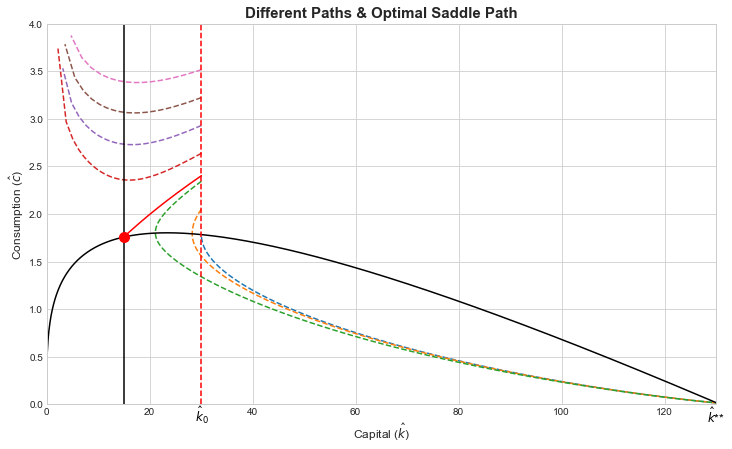

In [18]:
#g. Given an initial level of capital
k0 = 2 * ram.steadystate['k_star']

#h. Different initial conditions for choices of consumption per effective worker
in_consvalues = np.linspace(1 * ram.steadystate['c_star'], 2 * ram.steadystate['c_star'], num=7)

#i. Creating a new plot
phase1 = plt.figure(figsize=(12,7))

#j Sample path for each value of consumption
for c_t in in_consvalues:
    ram.k_t, ram.c_t = k0, c_t
    tmr = ram.sample(3000) 
    plt.plot(tmr[:, 0], tmr[:, 1], linestyle ='dashed')

#k. Adding loci 
plt.plot(x1_vec, locus_cap(x1_vec), linestyle = 'solid', color ='black')
plt.axvline(ram.steadystate['k_star'], linestyle = 'solid', color='black' )
plt.plot(ram.steadystate['k_star'], ram.steadystate['c_star'], marker='o', markersize=10, color='red') 

#l. Adding saddle path
ram_sol = ram.algorithm(k0, eps=1.5e-04)
plt.plot(ram_sol[1][:, 0], ram_sol[1][:, 1], linestyle = 'solid', color='red')

#m. Adding the line which identify initial level of capital per worker and k0, k** symbol
plt.axvline(k0, linestyle='--', color = 'red')
plt.text(130, 0, "$\hat{k}$**", color="black", ha='center', va = 'top', fontsize=12)
plt.text(k0, 0, "$\hat{k}_0$", color="black", ha='center', va = 'top', fontsize=12)

#n. Adding axis features and title
plt.xlim(0, 130)
plt.ylim(0, 4)
plt.xlabel('Capital ($\hat{k}$)', fontsize = 12)
plt.ylabel('Consumption ($\hat{c}$)', fontsize = 12)
plt.title('Different Paths & Optimal Saddle Path', fontsize=15, weight='bold')

plt.show()

We have chosen another $\hat{k}_0$, this time on the right of the steady state. We can see again the optimal saddle-path (red solid line) which is unique and can be achieved if only that particular value of $c_0$ is chosen. Again, Values of $\hat{c}_0$ too low bring to the condition of full capital and no consumption $\hat{k}^{**}$, meanwhile value of $\hat{c}_0$ too high bring to the condition of full consumption but any capital.

## 6. Conclusion

In conclusion, we have seen the optimizing behaviour of our consumer and our firm individually. In the Ramsey model their interaction produced the phase diagram of *Section.5*. In particular the elasticity of intertemporal substitution ($1/\theta$) determines the speed of the adjustment to the steady state and the behavior of the saving rate during the transition. For example, if the elasticity is high then large changes in consumption are not very costly to consumers and, if the real interest rate is high, they will save more. Instead, if the elasticity is low and the real interest rate high, then the consumption smoothing motive is very strong and consumer will save less and consume more.